# Modèle Naive Bayes

par Ali

## 1. Télechargement des packages nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 2. Importation des ensembles d'entraînement et de test (validation croisée)

In [2]:
with open('variables.pkl', 'rb') as f:
    (df, X_train, X_test, y_train, y_test,X_train_smote, y_train_smote) = pickle.load(f)

In [3]:
print(df.columns)

Index(['comportement_risqueSexuel', 'comportement_alimentation',
       'comportement_hygienePersonnelle', 'intention_aggrégation',
       'intention_engagement', 'attitude_cohérence', 'attitude_spontanéité',
       'norme_personneImportante', 'norme_accomplissement',
       'perception_vulnérabilité', 'perception_sévérité', 'motivation_force',
       'motivation_volonté', 'soutienSocial_émotionnel',
       'soutienSocial_appréciation', 'soutienSocial_instrumental',
       'autonomisation_connaissance', 'autonomisation_compétences',
       'autonomisation_désirs', 'cancer_colUterus'],
      dtype='object')


In [4]:
print(df.shape)

(72, 20)


## 3. Naive Bayes

 Précision du modèle : 0.91

 Rapport de Classification :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.71      0.83         7

    accuracy                           0.91        22
   macro avg       0.94      0.86      0.89        22
weighted avg       0.92      0.91      0.90        22


 Matrice de Confusion :
 [[15  0]
 [ 2  5]]


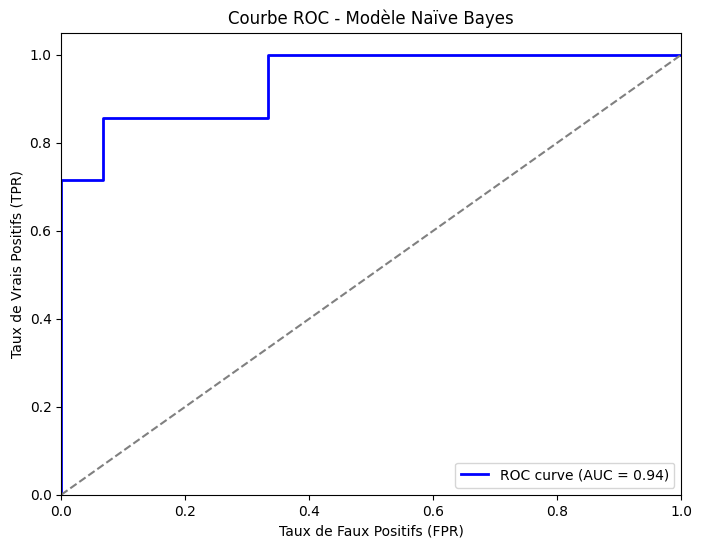

In [5]:
#  le modèle Naïve Bayes
model_nb = GaussianNB()
model_nb.fit(X_train_smote, y_train_smote)

#  prédictions
y_pred = model_nb.predict(X_test)
y_prob = model_nb.predict_proba(X_test)[:, 1]

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du modèle : {accuracy:.2f}")

print("\n Rapport de Classification :\n", classification_report(y_test, y_pred))

print("\n Matrice de Confusion :\n", confusion_matrix(y_test, y_pred))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Modèle Naïve Bayes')
plt.legend(loc="lower right")
plt.show()

## 4. Exporter les variables

In [6]:
roc_data_NB = {
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
}

# Sauvegarder les données dans un fichier pickle
with open('roc_data_NB.pkl', 'wb') as file:
    pickle.dump(roc_data_NB, file)

print("Les données ROC et AUC ont été enregistrées avec succès dans 'roc_data_NB.pkl'.")

Les données ROC et AUC ont été enregistrées avec succès dans 'roc_data_NB.pkl'.
